In [1]:
pip install xlrd==1.2.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.3/103.3 kB 2.3 MB/s eta 0:00:0000:01
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install xlsxwriter

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.0/150.0 kB 2.3 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [3]:
name_file = "CNN_LSTM_dataset_2"

In [4]:
from sklearn import metrics , cross_decomposition, model_selection
from sklearn.model_selection import cross_validate
from scipy.signal import savgol_filter
import pandas as pd
import numpy as np
import xlrd
#import xlsxwriter
from sklearn.preprocessing import StandardScaler, MinMaxScaler #for calculate SNV
import time
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler ## for calculate SNV
from sklearn.model_selection import train_test_split as split
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut 
from sys import stdout
import re
from keras.layers.advanced_activations import LeakyReLU
from sklearn.model_selection import train_test_split   
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from keras.layers import Input
from keras.utils import np_utils

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ write name of output file name 
time1=time.time()

# ================= import data
workbook = pd.read_csv('/kaggle/input/dataset23attackscsvmulti/new-Dataset-23-attacks.csv')
X = workbook.drop(['attack_cat','label'], axis=1) # droped label
Y = workbook.loc[:,['label']]
#workbook = xlrd.open_workbook("/content/Train_data_2.xlsx","rb")
#sheets = workbook.sheet_names()
#sheet_num=1  ## add sheet number # 5
#sh = workbook.sheet_by_name(sheets[(sheet_num)-1])
#n_cols=0 ##number of colum you have to delet from the front
#n_rows=0 ##number of rows you have to delet from the front 
#m_cols=0 ## number of colum you have to delet from the end
#m_rows=0 ## number of rows you have to delet from the end
#M_rows=sh.nrows-m_rows
#M_cols=sh.ncols-m_cols
#required_data = []
#for rownum in range(n_rows,M_rows):
    #row_valaues = sh.row_values(rownum)
    #required_data.append(row_valaues[n_cols:M_cols])
#Required_data=np.asarray(required_data)
#X=Required_data[1:82334,1:40].astype(float)  #  25194 # 82334  ( 4:41 & 1:40)
#X= np.array (X)

#Y=Required_data[1:82334,41:42].astype(float).ravel()    # (42:43  & 41:42)
#print(X.shape)

#bands = Required_data[0:1, 1:40]      # ( 4:41 & 1:40)
#bands= np.array (bands)
#===============
X_train, X_test, y_train, y_test = split(X, Y, test_size=(0.25), random_state=42)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
# ==============================================

nb_classes = len (np.unique( y_train ))
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

X_train_CNN = X_train.values.reshape(X_train.shape[0], 1, 23, 1)   #Reshape for CNN - should work!!
X_test_CNN = X_test.values.reshape(X_test.shape[0], 1, 23, 1)

#X_train_CNN=np.random.randint(0, 100, (257673, 23))
#dim1, dim2, dim3, dim4 = 257673, 23, 1, 1
#X_train_CNN= X_train_CNN.reshape((dim1, dim2 , dim3, dim4))
#X_train_CNN = X_train.reshape(257673, 23, 1, 1)  #Reshape for CNN - should work!!
#X_test_CNN=np.random.randint(0, 100, (51535, 23))
#dime1, dime2, dime3, dime4 = 51535, 23, 1, 1
#X_test_CNN = X_test_CNN.reshape((dime1, dime2 , dime3, dime4))

X_train_LSTM = X_train.values.reshape(X_train.shape[0],23,1)   #Reshape for lstm - should work!!
X_test_LSTM = X_test.values.reshape(X_test.shape[0],23,1)
print('class', nb_classes)

class 10


# New Section

In [5]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
import numpy as np
from keras.utils import np_utils
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, Flatten, MaxPooling2D,BatchNormalization
from keras.layers import LSTM,TimeDistributed,Conv1D,MaxPooling1D
from keras.layers import Dense, Dropout, Flatten
from keras import models
from keras import layers
from keras.models import Model
from keras.layers import concatenate

CNN_model = Sequential()
CNN_model.add(Conv2D(512, kernel_size=(3, 3),activation='tanh',padding='same',input_shape=(1,23,1)))
CNN_model.add(BatchNormalization())
CNN_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
CNN_model.add(Conv2D(256, (3, 3), activation='tanh',padding='same'))
CNN_model.add(BatchNormalization())
CNN_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
CNN_model.add(Conv2D(256, (3, 3), activation='tanh',padding='same'))
CNN_model.add(Conv2D(256, (3, 3), activation='tanh',padding='same'))
CNN_model.add(BatchNormalization())
CNN_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
CNN_model.add(Conv2D(128, (3, 3), activation='tanh',padding='same')) #~~~~~~~~~~~   512
CNN_model.add(Conv2D(128, (3, 3), activation='tanh',padding='same')) #~~~~~~~~~~~   512
CNN_model.add(Conv2D(128, (3, 3), activation='tanh',padding='same')) #~~~~~~~~~~~   512
CNN_model.add(BatchNormalization())
CNN_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
CNN_model.add(Flatten())


2022-11-30 22:53:27.877195: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-30 22:53:27.878665: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-30 22:53:28.133885: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-30 22:53:28.135269: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-30 22:53:28.136496: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S

In [20]:
model_lstm = Sequential() #=============================== climate-based model
model_lstm.add(LSTM(units = 512, return_sequences = True, input_shape = (23, 1), activation='tanh'))
model_lstm.add(LSTM(units = 256, return_sequences = True))
model_lstm.add(Dense(128, activation='relu'))
model_lstm.add(Dense(128, activation='relu'))
model_lstm.add(Dropout(0.2))
model_lstm.add(Dense(128, activation='relu'))
model_lstm.add(Dropout(0.2))
model_lstm.add(Flatten())

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
conv2d_input (InputLayer)       [(None, 1, 23, 1)]   0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 1, 23, 512)   5120        conv2d_input[0][0]               
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 1, 23, 512)   2048        conv2d[0][0]                     
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 1, 12, 512)   0           batch_normalization[0][0]        
____________________________________________________________________________________________

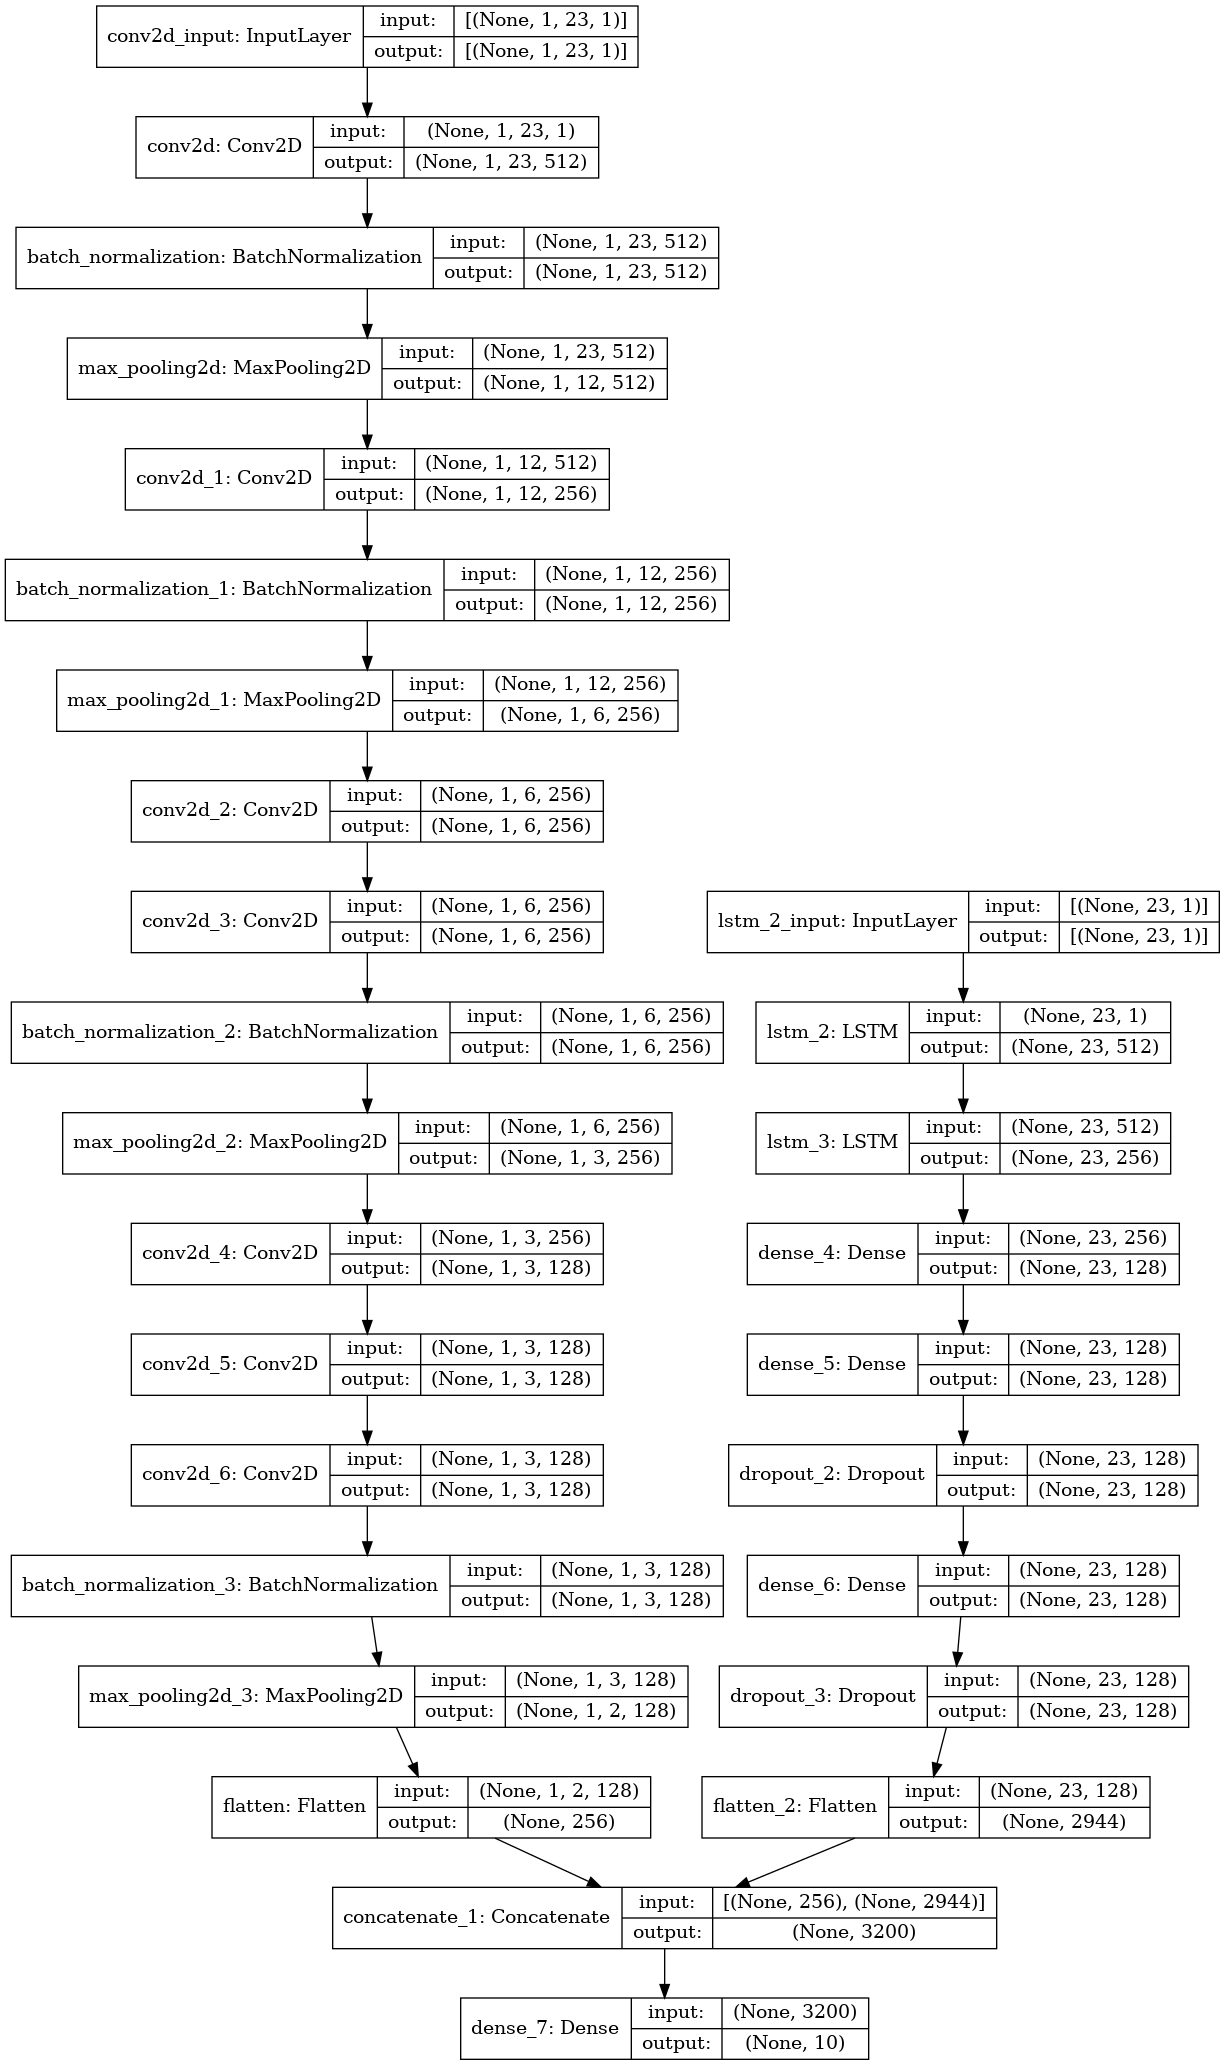

In [21]:
output = concatenate([CNN_model.output, model_lstm.output], axis=-1)
output_model = (Dense (nb_classes,activation='softmax'))(output) 
model_final = Model(inputs=[CNN_model.input, model_lstm.input], outputs=output_model)
model_final.summary()

from keras.utils.vis_utils import plot_model
plot_model(model_final, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [22]:
from keras.callbacks import ModelCheckpoint
from keras.callbacks import CSVLogger

model_final.compile(loss=keras.losses.binary_crossentropy,optimizer='RMSprop',metrics=['accuracy'])  

csv_logger = CSVLogger('training.log', separator=',', append=False)
mc = ModelCheckpoint(name_file +'.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)
cnn11 = model_final.fit([X_train_CNN,X_train_LSTM],Y_train, batch_size=300, epochs=100, validation_data=([X_test_CNN,X_test_LSTM] ,Y_test), callbacks=[mc,csv_logger])
print (("Training time=", time.time()-time1))
np.save("CNN_LSTM_data_2_@history", cnn11.history)

Epoch 1/100
688/688 [==============================] - 47s 60ms/step - loss: 0.0896 - accuracy: 0.7997 - val_loss: 0.0781 - val_accuracy: 0.8058

Epoch 00001: val_loss improved from inf to 0.07815, saving model to CNN_LSTM_dataset_2.h5
Epoch 2/100
688/688 [==============================] - 40s 58ms/step - loss: 0.0765 - accuracy: 0.8155 - val_loss: 0.0767 - val_accuracy: 0.8153

Epoch 00002: val_loss improved from 0.07815 to 0.07670, saving model to CNN_LSTM_dataset_2.h5
Epoch 3/100
688/688 [==============================] - 40s 58ms/step - loss: 0.0759 - accuracy: 0.8167 - val_loss: 0.0757 - val_accuracy: 0.8155

Epoch 00003: val_loss improved from 0.07670 to 0.07572, saving model to CNN_LSTM_dataset_2.h5
Epoch 4/100
688/688 [==============================] - 40s 58ms/step - loss: 0.0753 - accuracy: 0.8186 - val_loss: 0.0757 - val_accuracy: 0.8163

Epoch 00004: val_loss did not improve from 0.07572
Epoch 5/100
688/688 [==============================] - 40s 58ms/step - loss: 0.0752 - a

In [23]:
###################### 2
from contextlib import redirect_stdout
with open('./'+name_file+".xls", 'w') as f:
    with redirect_stdout(f):
        CNN_model.summary()

In [25]:
import pandas as pd
log_data = pd.read_csv('./training.log', sep=',', engine='python')
#print (log_data)
CNN_LSTM_data_2 =log_data

In [26]:
print (name_file)

CNN_LSTM_dataset_2


In [27]:
import numpy as np
CNN_LSTM_11_history_11=np.load('./CNN_LSTM_data_2_@history.npy',allow_pickle='TRUE').item()

In [28]:
from keras.models import load_model
####################### 1
name_file11 = './CNN_LSTM_dataset_2.h5' 
fashion_model = load_model(name_file11) # load model
fashion_model.summary() # summarize model.

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
conv2d_input (InputLayer)       [(None, 1, 23, 1)]   0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 1, 23, 512)   5120        conv2d_input[0][0]               
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 1, 23, 512)   2048        conv2d[0][0]                     
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 1, 12, 512)   0           batch_normalization[0][0]        
____________________________________________________________________________________________

In [29]:
val_loss, val_accuracy=fashion_model.evaluate([X_test_CNN,X_test_LSTM] ,Y_test) ## to get test accuracy and losses
print(val_loss, val_accuracy)

1611/1611 [==============================] - 12s 7ms/step - loss: 0.0729 - accuracy: 0.8236
0.07294163852930069 0.8235567808151245


In [30]:

time2=time.time()
predict_prob=fashion_model.predict([X_test_CNN,X_test_LSTM])
y_pred=np.argmax(predict_prob,axis=1)
print ('classification time:', time.time()-time2)

##print (y_pred)
y_true=np.argmax(Y_test, axis=1)
from sklearn.metrics import precision_recall_fscore_support as score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix
CM = confusion_matrix(y_true, y_pred)
print (CM)
print(classification_report(y_true, y_pred))

precision = precision_score(y_test, y_pred, average='weighted')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, y_pred, average='weighted')
print('Recall: %f' % recall)
# f1: tp / (tp + fp + fn)
f1 = f1_score(y_test, y_pred, average='weighted')
print('F1 score: %f' % f1)
#-----------  IoU
from sklearn.metrics import jaccard_score
print ('IoU:', jaccard_score(y_true, y_pred, average='micro'))


test_eval = fashion_model.evaluate([X_test_CNN,X_test_LSTM], Y_test)

loss, accuracy = fashion_model.evaluate([X_train_CNN,X_train_LSTM], Y_train)
print('loss_train: ', loss, 'accuracy_train: ', accuracy)
print('Test loss:', test_eval[0], 'Test accuracy:', test_eval[1])

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
#================ classification metrics
# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
print ('TPR',TPR)   
# Specificity or true negative rate
TNR = TN/(TN+FP) 
print('TNR',TNR)
# Precision or positive predictive value
PPV = TP/(TP+FP)
print ('PPV', PPV)
# Negative predictive value
NPV = TN/(TN+FN)
print('NPV', NPV)
# Fall out or false positive rate
FPR = FP/(FP+TN)
print('FPR',FPR)
# False negative rate
FNR = FN/(TP+FN)
print ('FNR',FNR)  
# False discovery rate
FDR = FP/(TP+FP)
print ('FDR',FDR)    
# Overall accuracy   
ACC = (TP+TN)/(TP+FP+FN+TN)
print ('ACC',ACC)

classification time: 10.886725902557373
[[17435    23     0     5   240     1   882     6     0    44]
 [    8  2096     3    10   630     0     3     5     0     3]
 [    2     4    28     4   431     0     0     0     0     2]
 [   23    11     4   218  2945     1    20    11     0    33]
 [  169   126     2    79  8401     2    80    38     4    32]
 [   87     0     0     0   456    28     1     0     0     0]
 [ 1585    14     0     1   639     0  2578     8     0    23]
 [    9     1     1    22   202     0    17 11467     0     8]
 [    1     0     0     1    21     0     1     0     3     0]
 [   25    15     0     1    47     0    19     2     0   188]]
              precision    recall  f1-score   support

           0       0.90      0.94      0.92     18636
           1       0.92      0.76      0.83      2758
           2       0.74      0.06      0.11       471
           3       0.64      0.07      0.12      3266
           4       0.60      0.94      0.73      8933
    

In [31]:
history_dict = CNN_LSTM_11_history_11 

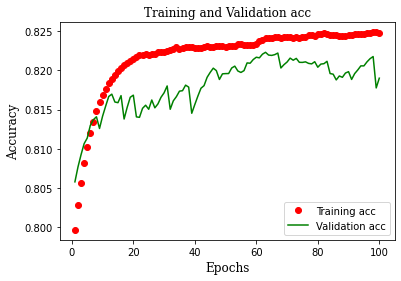

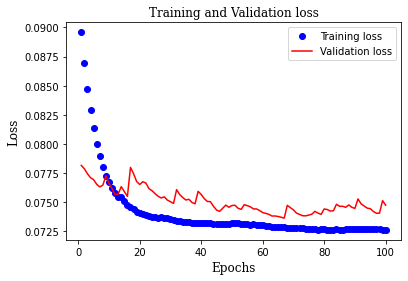

In [32]:
#history_dict=cnn11.history
loss_values=history_dict['loss']
val_loss_values=history_dict['val_loss']
acc_values=history_dict['accuracy']
val_acc_values=history_dict['val_accuracy']
epochs=range(1, len(acc_values)+1)
def smooth_curve(points, factor=0.8):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points
loss_values=smooth_curve(loss_values)
val_loss_values=smooth_curve(val_loss_values)
acc_values=smooth_curve(acc_values)
val_acc_values=smooth_curve(val_acc_values)

font = {'family' : 'serif',
        'color'  : 'black',
        'weight' : 'normal',
        'size'   : 12}
        

plt.plot(epochs, acc_values, 'ro', label='Training acc')
plt.plot(epochs, val_acc_values, 'g', label='Validation acc')
plt.title('Training and Validation acc', fontdict=font)
plt.xlabel('Epochs', fontdict=font)
plt.ylabel('Accuracy', fontdict=font)
plt.legend()
plt.savefig("accuracy"+name_file+".png")
plt.show()

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'r', label='Validation loss')
plt.title('Training and Validation loss', fontdict=font)
plt.xlabel('Epochs',fontdict=font)
plt.ylabel('Loss',fontdict=font)
plt.legend()
plt.savefig("loss"+name_file+".png")
plt.show()


Confusion matrix, without normalization


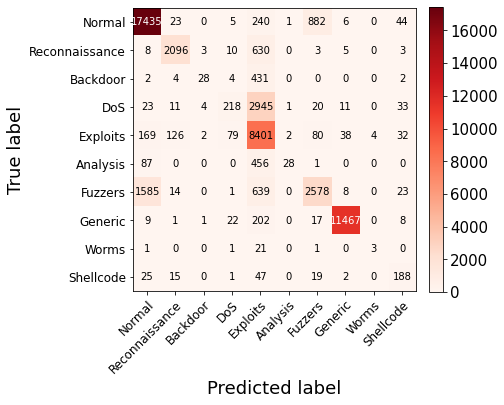

Normalized confusion matrix


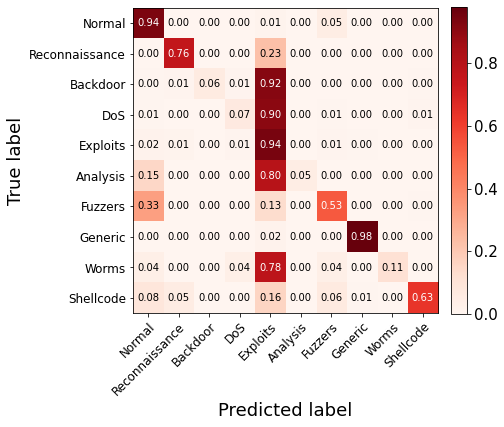

In [33]:
class_names = ['Normal',
'Reconnaissance',
'Backdoor',
'DoS',
'Exploits',
'Analysis',
'Fuzzers',
'Generic',
'Worms',
'Shellcode'
]


def plot_confusion_matrix(y_true, y_pred, classes,normalize=False,title=None, cmap=plt.cm.Reds):
                                              
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = None    ### 'Normalized confusion matrix'
        else:
            title = None        ### 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
#    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    fig, ax = plt.subplots(figsize=(7,7))
    ax.tick_params(labelsize=12)       #7777777777777777777777777777777777777777777777777777
    cmap=plt.cm.Reds                      #  cmap=plt.cm.Blues
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    cbar = ax.figure.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
    for t in cbar.ax.get_yticklabels():
        t.set_fontsize(15)
    
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",rotation_mode="anchor")
             
    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

font = {'family' : 'Times New Roman',
        'color'  : 'black',
        'weight' : 'bold',
        'size'   : 15}

np.set_printoptions(precision=2) ########################## 2

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=class_names,title= None)             
plt.xlabel('Predicted label', fontsize=18)
plt.ylabel('True label', fontsize=18)
plt.savefig('confusion matrix_1_'+name_file+'.png')
plt.show()

# Plot normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=class_names, normalize=True,title=None)            
plt.xlabel('Predicted label', fontsize=18)
plt.ylabel('True label', fontsize=18)
plt.savefig('confusion matrix_2_'+name_file+'.png')
plt.show()

In [34]:
from IPython.display import FileLink
FileLink(r'./CNN_LSTM_dataset_2.h5') #=======================

/kaggle/working/CNN_LSTM_dataset_2.h5